<a name="top"></a>
## Contents

* [Setup](#Setup)
* [References](#References)
* [1/I](#1NAI)
* [1/C](#1NAC)
* [1/J](#1NAJ)
* [2/C](#2NAC)

(WIP, more to follow)

<a id="top"></a>

## Setup

In this notebook, we will run the MOCMA optimizer for functions described in the Convex Quadratic Bi-Objective benchmark [1] (here abbreviated as MOQ).
For these functions, an analytical form of the optimal Pareto front is known.

For each function, we will run 4 different configurations of the MOCMA optimizer for 5 trials with a maximum of 100.000 function evaluations.

In [1]:
import dataclasses

import math
import numpy as np

from anguilla.fitness import benchmark

from experiment import TrialParameters, run_trials, population_plot_2d, pareto_front_plot_2d, runtime_summary, volume_summary

In [2]:
# 1) Configurable global settings

# Number of trials
N_TRIALS = 5

# Number of dimensions
N_DIMENSIONS = 10

# Number of parents
N_PARENTS = 20

INITIAL_STEP_SIZE = 3.0

# Condition number
K = 1e3

# For reproducible results we set a base seed to create the seed 
# sequence used to generate children seeds for each independent trial
SEED = 4566785

# Maximum number of evaluations to run the optimizer for
MAX_EVALUATIONS = 100000

# 2) Other global values

# Store common parameters which are customized using dataclasses.replace
def get_base_params(key: str):
    return TrialParameters(
                benchmark.MOQ,
                fn_args=(key, N_DIMENSIONS,),
                fn_kwargs={"k": K},
                # All instances of the benchmark function will be
                # created with this seed
                fn_rng_seed=SEED,
                n_parents=N_PARENTS,
                initial_step_size=INITIAL_STEP_SIZE,
                max_evaluations=MAX_EVALUATIONS,
            )

def run(key: str, **parameter_replacements: dict):
    params = dataclasses.replace(get_base_params(key), **parameter_replacements)
    results = run_trials(params, seed=SEED, n_trials=N_TRIALS)
    runtime_summary(results)
    volume_summary(results)
    return population_plot_2d(results)


def pareto_front(key: str):
    parameters = PARAMETERS[key]
    if parameters.fn_rng_seed is not None:
        parameters.fn_kwargs["rng"] = np.random.default_rng(parameters.fn_rng_seed)
    fn = parameters.fn_cls(*parameters.fn_args, **parameters.fn_kwargs)
    return pareto_front_plot_2d(fn)

<a name="1NAI"></a>
## 1/I
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 116.96s, ask = 77.99s, tell = 21.21s, eval = 17.76s
No reference point was provided.


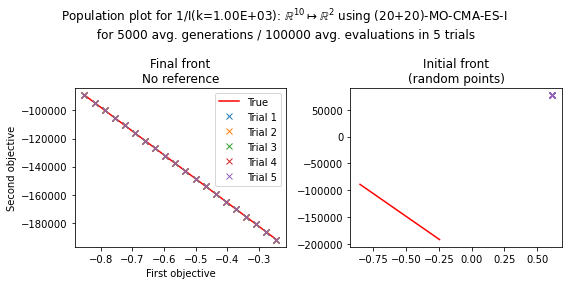

In [3]:
fig = run("1/I", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 117.72s, ask = 78.22s, tell = 21.17s, eval = 18.33s
No reference point was provided.


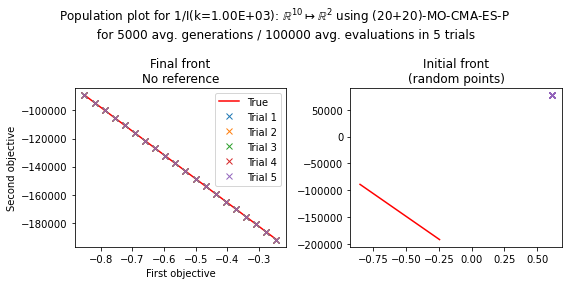

In [4]:
fig = run("1/I")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 233.78s, ask = 119.17s, tell = 74.48s, eval = 40.13s
No reference point was provided.


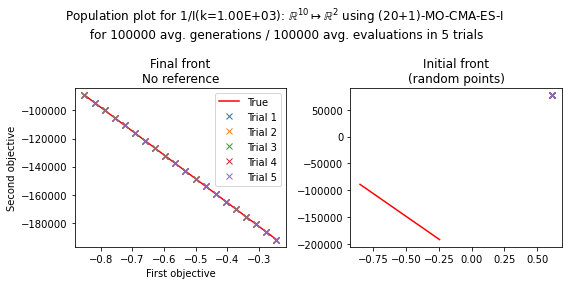

In [5]:
fig = run("1/I", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 273.72s, ask = 139.55s, tell = 87.26s, eval = 46.90s
No reference point was provided.


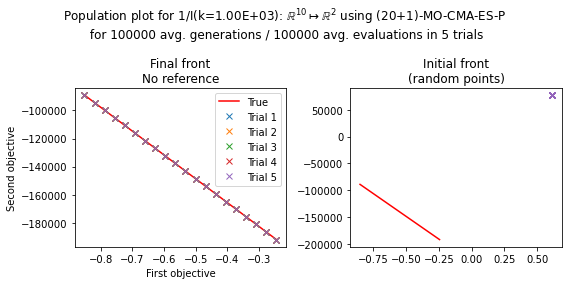

In [6]:
fig = run("1/I", n_offspring=1)

<a name="1NAC"></a>
## 1/C
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 111.12s, ask = 75.41s, tell = 19.74s, eval = 15.97s
No reference point was provided.


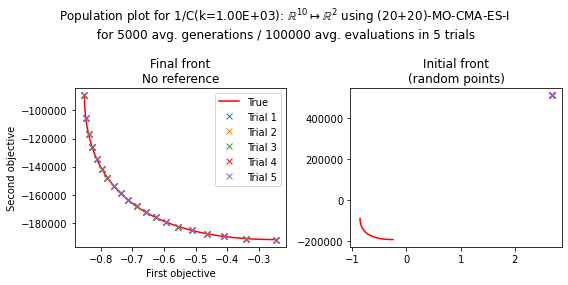

In [7]:
fig = run("1/C", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 78.08s, ask = 52.63s, tell = 14.21s, eval = 11.23s
No reference point was provided.


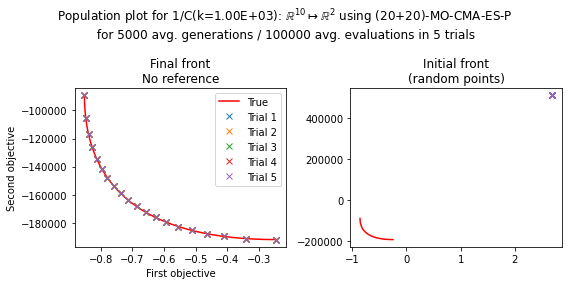

In [8]:
fig = run("1/C")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 169.03s, ask = 86.37s, tell = 54.56s, eval = 28.10s
No reference point was provided.


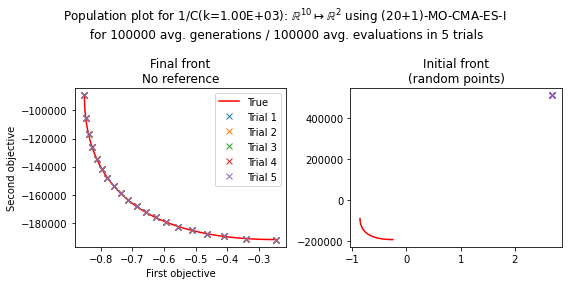

In [9]:
fig = run("1/C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 138.21s, ask = 71.01s, tell = 44.18s, eval = 23.02s
No reference point was provided.


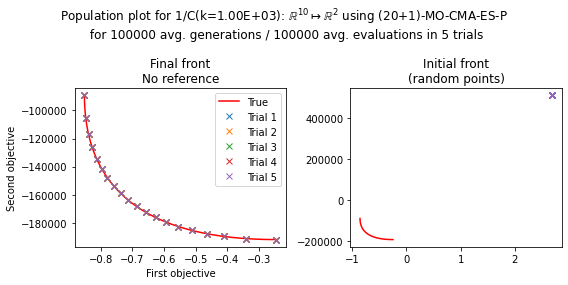

In [10]:
fig = run("1/C", n_offspring=1)

<a name="1NAJ"></a>
## 1/J
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 49.79s, ask = 33.36s, tell = 8.90s, eval = 7.52s
No reference point was provided.


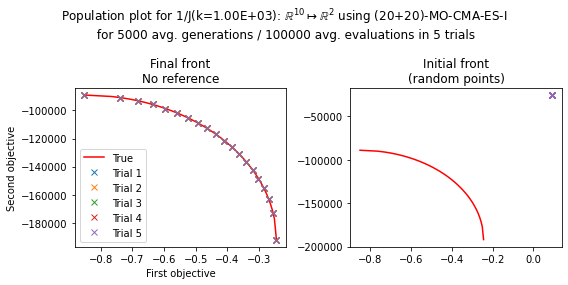

In [11]:
fig = run("1/J", success_notion="individual")

### Population-based

We observe that unlike with the individual-based notion of success, the extrema are populated.

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 49.38s, ask = 33.22s, tell = 8.77s, eval = 7.40s
No reference point was provided.


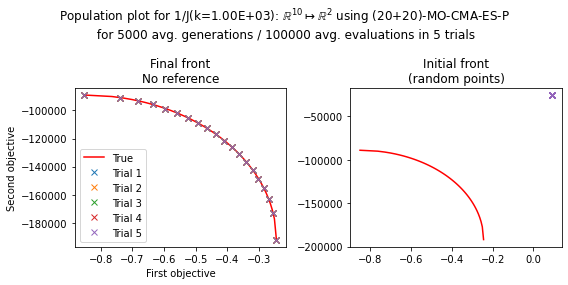

In [12]:
fig = run("1/J")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 126.18s, ask = 64.23s, tell = 40.25s, eval = 21.70s
No reference point was provided.


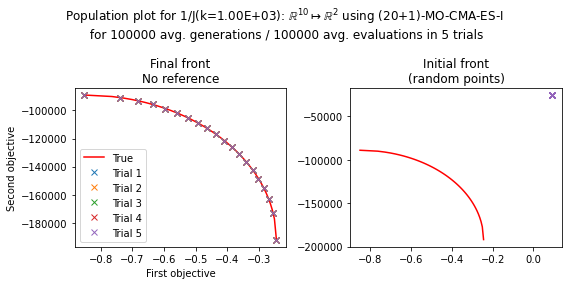

In [13]:
fig = run("1/J", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 116.49s, ask = 59.06s, tell = 37.65s, eval = 19.78s
No reference point was provided.


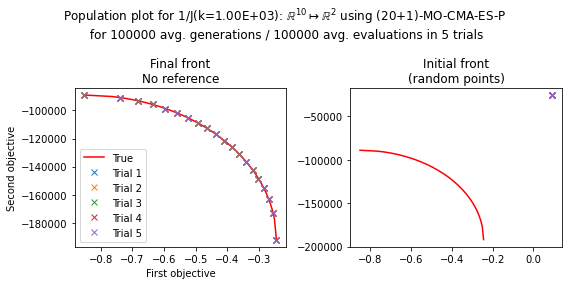

In [14]:
fig = run("1/J", n_offspring=1)

<a name="2NAC"></a>
## 2/C
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 54.60s, ask = 36.79s, tell = 9.97s, eval = 7.84s
No reference point was provided.


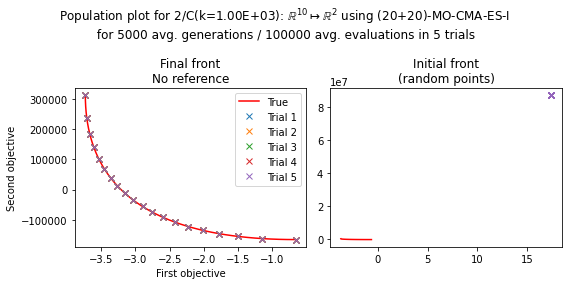

In [15]:
fig = run("2/C", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 76.14s, ask = 51.40s, tell = 13.70s, eval = 11.05s
No reference point was provided.


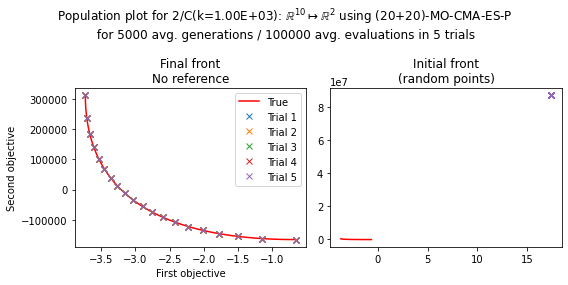

In [16]:
fig = run("2/C")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 144.46s, ask = 74.47s, tell = 46.39s, eval = 23.61s
No reference point was provided.


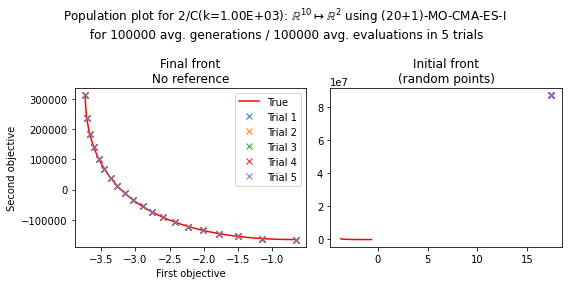

In [17]:
fig = run("2/C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 128.59s, ask = 66.01s, tell = 41.43s, eval = 21.14s
No reference point was provided.


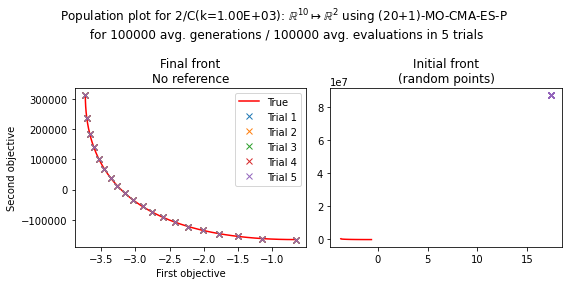

In [18]:
fig = run("2/C", n_offspring=1)

## (Below is WIP)

<a name="3AC"></a>
## 3|C
[Back to top](#top)

### Individual-based

In [ ]:
fig = run("3|C", success_notion="individual")

### Population-based

In [ ]:
fig = run("3|C")

### Steady-state, individual-based

In [ ]:
fig = run("3|C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("3|C", n_offspring=1)

<a name="4AC"></a>
## 4|C
[Back to top](#top)

### Individual-based

In [ ]:
fig = run("4|C", success_notion="individual")

### Population-based

In [ ]:
fig = run("4|C")

### Steady-state, individual-based

In [ ]:
fig = run("4|C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("4|C", n_offspring=1)

<a name="5AC"></a>
## 5|C
[Back to top](#top)

### Individual-based

In [ ]:
fig = run("5|C", success_notion="individual")

### Population-based

In [ ]:
fig = run("5|C")

### Steady-state, individual-based

In [ ]:
fig = run("5|C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("5|C", n_offspring=1)

<a name="6AC"></a>
## 6|C
[Back to top](#top)

### Individual-based

In [ ]:
fig = run("6|C", success_notion="individual")

### Population-based

In [ ]:
fig = run("6|C")

### Steady-state, individual-based

In [ ]:
fig = run("6|C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("6|C", n_offspring=1)

## References
[Back to top](#top)

[1] Glasmachers, T. Challenges of convex quadratic bi-objective benchmark problems. En Proceedings of the Genetic and Evolutionary Computation Conference. 2019. p. 559-567.